In [1]:
#dataset --> https://www.kaggle.com/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking
#tutorial datacamp --> https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
candy_dataset = pd.read_csv("/content/candy-data.csv", sep = ",", encoding = "ISO-8859-1")

In [4]:
candy_dataset.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


In [5]:
#traduzindo as colunas
candy_dataset = candy_dataset.rename(columns = {'competitorname' : 'competidor',
                                'fruity' : 'fruta',
                                'caramel' : 'caramelo',
                                'peanutyalmondy' : 'amendoim_amendoa',
                                'nougat' : 'torrone',
                                'crispedricewafer' : 'bolacha_arroz_crocante',
                                'hard': 'duro',
                                'bar' : 'barra',
                                'pluribus' : 'mais',
                                'sugarpercent' : 'percentual_acucar',
                                'pricepercent' : 'preco_percentil',
                                'winpercent' : 'vitoria_percentil'})

In [6]:
candy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   competidor              85 non-null     object 
 1   chocolate               85 non-null     int64  
 2   fruta                   85 non-null     int64  
 3   caramelo                85 non-null     int64  
 4   amendoim_amendoa        85 non-null     int64  
 5   torrone                 85 non-null     int64  
 6   bolacha_arroz_crocante  85 non-null     int64  
 7   duro                    85 non-null     int64  
 8   barra                   85 non-null     int64  
 9   mais                    85 non-null     int64  
 10  percentual_acucar       85 non-null     float64
 11  preco_percentil         85 non-null     float64
 12  vitoria_percentil       85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [7]:
candy_dataset.describe()

,chocolate,fruta,caramelo,amendoim_amendoa,torrone,bolacha_arroz_crocante,duro,barra,mais,percentual_acucar,preco_percentil,vitoria_percentil
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [8]:
candy_dataset.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of     competidor  chocolate  fruta  caramelo  amendoim_amendoa  torrone  \
0        False      False  False     False             False    False   
1        False      False  False     False             False    False   
2        False      False  False     False             False    False   
3        False      False  False     False             False    False   
4        False      False  False     False             False    False   
..         ...        ...    ...       ...               ...      ...   
80       False      False  False     False             False    False   
81       False      False  False     False             False    False   
82       False      False  False     False             False    False   
83       False      False  False     False             False    False   
84       False      False  False     False             False    False   

    bolacha_arroz_crocante   duro  barra   mais  percentual_a

In [9]:
#retirando nome do chocolate, chocolate, duro, percentual de acucar e % de vitoria
x = candy_dataset.drop(["competidor", "chocolate", "duro", 
                        "percentual_acucar", "vitoria_percentil", 
                        "preco_percentil"], axis=1)
#mantendo apenas o target --> chocolate
y = candy_dataset["chocolate"]

In [10]:
#split de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x.values, y.values, test_size = 0.3)

In [11]:
regressao_logistica = LogisticRegression()

In [12]:
regressao_logistica.fit(x_treino, y_treino)

LogisticRegression()

In [13]:
previsao = regressao_logistica.predict(x_teste)

In [14]:
print("Acuracia --> %.2f" % (metrics.accuracy_score(y_teste, previsao)*100))
print("Precisao --> %.2f" % (metrics.precision_score(y_teste, previsao)*100))
print("Recall --> %.2f" % (metrics.recall_score(y_teste, previsao)*100))

Acuracia --> 84.62
Precisao --> 81.82
Recall --> 81.82


Text(0.5, 257.44, 'Previsão')

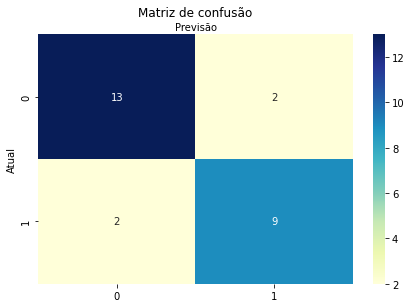

In [20]:
cnf_matrix = metrics.confusion_matrix(y_teste, previsao)
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusão', y=1.1)
plt.ylabel('Atual')
plt.xlabel('Previsão')

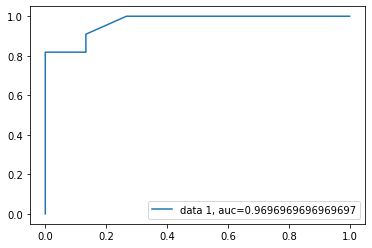

In [16]:
#Receiver Operating Characteristic (ROC) Curve
previsao_proba = regressao_logistica.predict_proba(x_teste)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_teste,  previsao_proba)
auc = metrics.roc_auc_score(y_teste, previsao_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [17]:
#fruta, caramelo, amendoim_amendoa, torrone, bolacha_arroz, barra, mais
previsao_chocolate_ou_nao = regressao_logistica.predict([[0, 1, 0, 0, 1, 0, 0]]) #é chocolate
previsao_chocolate_ou_nao_2 = regressao_logistica.predict([[1, 1, 0, 0, 0, 0, 0]]) #não é chocolate

In [18]:
print(previsao_chocolate_ou_nao)
print(previsao_chocolate_ou_nao_2)

[1]
[0]


In [19]:
print("Coeficientes: ", regressao_logistica.coef_)
print("Intercept:", regressao_logistica.intercept_)

Coeficientes:  [[-2.34247108 -0.12482785  0.28443644  0.0705222   0.78298256  1.27222925
  -0.05733452]]
Intercept: [0.15893803]
